In [1]:
#Implementing the Reuters news classifier from Chapter 3.5 in Deep Learning with Python

#Importing the necessary libraries
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt


In [2]:
#Importing and splitting the data into training and testing data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#Looking at the data shape
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
#One-hot encoding the training and testing data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
#One-hot encoding the traiing and testing labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
#Defining the layers of the neural network
#This time, each layer has more neurons per layer to account for the increased output required
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [6]:
#Compiling the model, this time with the categorical_crossentropy loss function
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#Setting aside a validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
#Training the model with 20 epochs, a batch size of 512, and validating with the validation data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))


Epoch 1/20
16/16 [==============================] - 0s 31ms/step - loss: 2.7170 - accuracy: 0.5228 - val_loss: 1.7984 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.4441 - accuracy: 0.7031 - val_loss: 1.3307 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0574 - accuracy: 0.7769 - val_loss: 1.1325 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8215 - accuracy: 0.8277 - val_loss: 1.0231 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6510 - accuracy: 0.8648 - val_loss: 1.0203 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5229 - accuracy: 0.8920 - val_loss: 0.9087 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4218 - accuracy: 0.9122 - val_loss: 0.9056 - val_accuracy: 0.8090
Epoch 8/20
16

In [9]:
#Evaluating the results
results = model.evaluate(x_test, one_hot_test_labels)
print('The loss is {} ({} epochs)'.format(round(results[0], 4), 20))
print('The accuracy is {} percent ({} epochs)'.format(round(results[1], 4)*100, 20))

71/71 [==============================] - 0s 2ms/step - loss: 1.2170 - accuracy: 0.7845
The loss is 1.217 (20 epochs)
The accuracy is 78.45 percent (20 epochs)


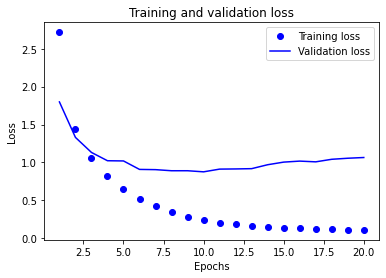

In [10]:
#Plotting the training loss and the validation loss for each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

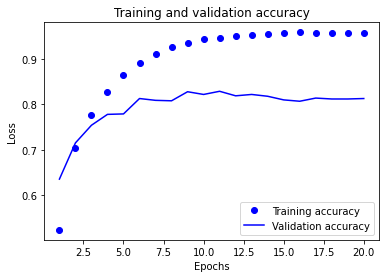

In [11]:
#Plotting the training accuracy and the validation accuracy for each epoch

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
#Retraining the model, this time with 9 epochs, and viewing its loss and accuracy

#Defining the layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Defining the optimizer, loss function, and metrics
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the model with the training data, 9 epochs, and a batch size of 512 
model.fit(partial_x_train, 
          partial_y_train, 
          epochs = 9, 
          batch_size = 512, 
          validation_data=(x_val, y_val))


Epoch 1/9
16/16 [==============================] - 0s 22ms/step - loss: 2.5915 - accuracy: 0.5317 - val_loss: 1.7045 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3948 - accuracy: 0.7100 - val_loss: 1.2666 - val_accuracy: 0.7280
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0213 - accuracy: 0.7853 - val_loss: 1.1250 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8023 - accuracy: 0.8312 - val_loss: 1.0095 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6326 - accuracy: 0.8663 - val_loss: 0.9441 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5055 - accuracy: 0.8973 - val_loss: 0.9100 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4073 - accuracy: 0.9171 - val_loss: 0.8802 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [13]:
#Evaluating the results
results = model.evaluate(x_test, one_hot_test_labels)
print('The loss is {} ({} epochs)'.format(round(results[0], 4), 9))
print('The accuracy is {} percent ({} epochs)'.format(round(results[1], 4)*100, 9))

71/71 [==============================] - 0s 2ms/step - loss: 0.9629 - accuracy: 0.7939
The loss is 0.9629 (9 epochs)
The accuracy is 79.39 percent (9 epochs)


In [14]:
#Generating topic predictions for the test data
predictions = model.predict(x_test)

In [15]:
#The length of each prediction should be 46
print(predictions[0].shape)

#The coefficients should have a sum of about 1
print(np.sum(predictions[0]))

#The largest entry in the prediction vector is the predicted class for that news
print(np.argmax(predictions[0]))

(46,)
0.9999999
3


In [16]:
#Retraining the 20-epoch model, this time with a neuron bottleneck introduced in the second layer
#Now there are 4 instead of 46 in the second layer

#Defining the layers 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Defining the optimizer, loss function, and metrics
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the model with the training data, 20 epochs, and a batch size of 128
model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))



Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.3284 - accuracy: 0.0948 - val_loss: 2.8127 - val_accuracy: 0.2860
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2413 - accuracy: 0.4214 - val_loss: 1.7965 - val_accuracy: 0.6260
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4227 - accuracy: 0.6837 - val_loss: 1.4077 - val_accuracy: 0.6700
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1599 - accuracy: 0.7165 - val_loss: 1.3242 - val_accuracy: 0.6820
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0269 - accuracy: 0.7516 - val_loss: 1.2962 - val_accuracy: 0.6970
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9266 - accuracy: 0.7762 - val_loss: 1.2614 - val_accuracy: 0.7110
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8415 - accuracy: 0.7964 - val_loss: 1.2602 - val_accuracy: 0.7120
Epoch 8/20
63/63 [==

In [17]:
#Evaluating the results
results = model.evaluate(x_test, one_hot_test_labels)
print('The loss is {} ({} epochs with bottleneck)'.format(round(results[0], 4), 20))
print('The accuracy is {} percent ({} epochs with bottleneck)'.format(round(results[1], 4)*100, 20))
#The accuracy is now much less with the bottleneck

71/71 [==============================] - 0s 3ms/step - loss: 2.1836 - accuracy: 0.6990
The loss is 2.1836 (20 epochs with bottleneck)
The accuracy is 69.89999999999999 percent (20 epochs with bottleneck)
